QQ图作用：直观的判断某数据是否符合某个分布（一般是正态分布）  
方法是：计算数据分百分位边界，并与高斯分布的百分位边界对比。如果此数据服从高斯分布，则画出来的点应该是一条直线

## 加载数据

In [1]:
from urllib import request

# 注意这种长字符串的写法，值得借鉴
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

req = request.Request(target_url, headers={"User-Agent": "Mozilla/5.0"})
with request.urlopen(req) as resp:
    data = resp.read()

x_list = []
labels = []

# 注意，这样读进来的数据都是字符串
for line in data.decode('utf-8').split('\n'):
    if not line.strip():
        continue
    
    row = line.strip().split(',')
    x_list.append(row)
    labels.append(row[-1])
    
nrows = len(x_list)
ncols = len(x_list[1])

print("Number of Rows: ", nrows)
print("Number of Columns: ", ncols)

Number of Rows:  208
Number of Columns:  61


## column 3(第4列)数据的统计描述

In [2]:
import numpy as np
# import pylab
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，字体名称为win中中文字体对应的英文名
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [4]:
col = 3
col_data = []
for row in x_list:
    col_data.append(float(row[col]))

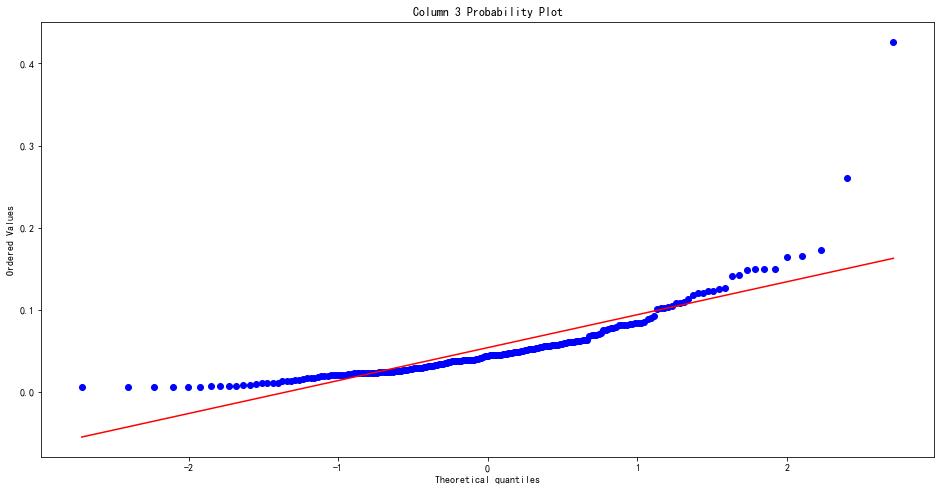

In [5]:
# fig = plt.figure(figsize=(16, 8))
# stats.probplot(np.array(col_data), dist='norm', plot=plt)  # 直接传col_data(list格式)也没有问题
# plt.title("Column 3 Probability Plot")
# plt.show()

# 还是面向对象的方式比较好
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
stats.probplot(np.array(col_data), dist='norm', plot=ax)  # 直接传col_data(list格式)也没有问题
ax.set_title("Column 3 Probability Plot")
plt.show()

上图显示，column 3尾部的数据要多于高斯分布尾部的数据